## Observations and Insights 

In [223]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [224]:
# Checking the number of mice.
no_mice=len(combined_data["Mouse ID"])
no_mice

1893

In [225]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped=combined_data.groupby(["Mouse ID"])
view_grouped=grouped["Timepoint"].value_counts()
view_grouped

Mouse ID  Timepoint
a203      0            1
          5            1
          10           1
          15           1
          20           1
                      ..
z969      25           1
          30           1
          35           1
          40           1
          45           1
Name: Timepoint, Length: 1888, dtype: int64

In [226]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df=combined_data.drop_duplicates(subset=["Mouse ID"], keep="last")
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [227]:
# Checking the number of mice in the clean DataFrame.
len(mouse_df["Mouse ID"])

249

## Summary Statistics

In [228]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group=mouse_df.groupby(["Drug Regimen"])
mean=regimen_group["Tumor Volume (mm3)"].mean()
median=regimen_group["Tumor Volume (mm3)"].median()
variance=regimen_group["Tumor Volume (mm3)"].var()
sd=regimen_group["Tumor Volume (mm3)"].std()
sem=regimen_group["Tumor Volume (mm3)"].sem()

#Turn summary statistics into dataframes
mean=pd.DataFrame(mean)
median=pd.DataFrame(median)
variance=pd.DataFrame(variance)
sd=pd.DataFrame(sd)
sem=pd.DataFrame(sem)

#Create one dataframe to hold summary statistics
mean["Median"]=median["Tumor Volume (mm3)"]
mean["Variance"]=variance["Tumor Volume (mm3)"]
mean["STD"]=sd["Tumor Volume (mm3)"]
mean["SEM"]=sem["Tumor Volume (mm3)"]

#Format
summary_stats=mean
summary_stats=summary_stats.rename(columns={"Tumor Volume (mm3)":"Mean"})
summary_stats=summary_stats.style.format({"Mean": "{:,.2f}", "Median": "{:,.2f}","Variance": "{:,.2f}","STD": "{:,.2f}", "SEM": "{:,.2f}"})

#Display summary statistic table
summary_stats

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


In [231]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_stats2 = mouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

#Format
summary_stats2=summary_stats2.rename(columns={"mean":"Mean", "median":"Median", "var":"Varaince", "std":"STD", "sem":"SEM"})
summary_stats2=summary_stats2.style.format({"Mean": "{:,.2f}", "Median": "{:,.2f}","Variance": "{:,.2f}","STD": "{:,.2f}", "SEM": "{:,.2f}"})

#Display summary statistic table
summary_stats2

&lt;pandas.io.formats.style.Styler at 0x25dc2fbc668&gt;

## Bar and Pie Charts

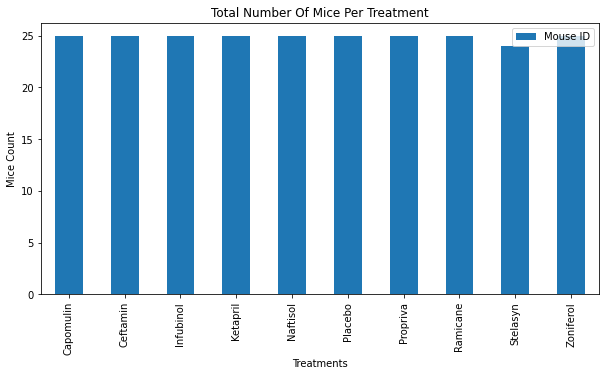

&lt;Figure size 432x288 with 0 Axes&gt;

In [60]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

#Create dataframe to hold data needed for bar chart
regimen_group=mouse_df.groupby(["Drug Regimen"])
bar_data=regimen_group["Mouse ID"].count()
bar_data=pd.DataFrame(bar_data)
bar_data

# Use DataFrame.plot() in order to create a bar chart of the data
bar_data.plot(kind="bar", figsize=(10,5))

# Give the chart a title, x label, and y label
plt.title("Total Number Of Mice Per Treatment")
plt.xlabel("Treatments")
plt.ylabel("Mice Count")

#Display chart with tight layout
plt.show()
plt.tight_layout()

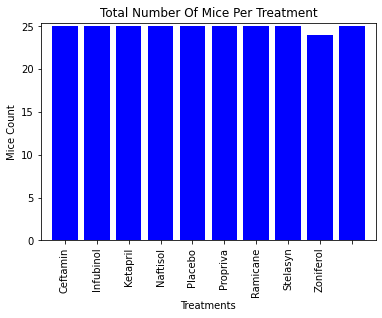

In [56]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#Define axis and labels
mice_per_regimen=bar_data["Mouse ID"]
x_axis=np.arange(len(mice_per_regimen))
regimens=["Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

#Create bar chart
plt.bar(x_axis, mice_per_regimen, color="b", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens, rotation="vertical")

# Set limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_per_regimen)+0.4)

# Give the chart a title, x label, and y label
plt.title("Total Number Of Mice Per Treatment")
plt.xlabel("Treatments")
plt.ylabel("Mice Count")

#Display bar chart
plt.show()

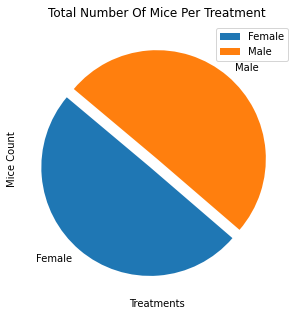

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Create dataframe to hold data needed for bar chart
gender_group=mouse_df.groupby(["Sex"])
pie_data=gender_group["Sex"].count()
pie_data=pd.DataFrame(pie_data)
pie_data

# Use DataFrame.plot() in order to create a bar chart of the data
pie_data.plot(kind="pie", y="Sex", figsize=(5,5), startangle=140, explode=(0.1,0), title=("Distribution Of Female Versus Male Mice"))

# Give the chart a title, x label, and y label
plt.title("Total Number Of Mice Per Treatment")
plt.xlabel("Treatments")
plt.ylabel("Mice Count")

#Display chart with tight layout
plt.show()



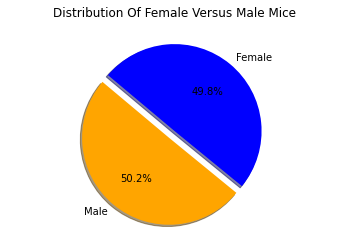

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Define characteristics of pie chart 
labels = ["Male", "Female"]
sizes = [125, 124]
colors = ["orange", "blue"]
explode = (0.1, 0)
plt.axis("equal")

# Creates the pie chart based upon the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Give the chart a title
plt.title("Distribution Of Female Versus Male Mice")

#Display bar chart
plt.show()

## Quartiles, Outliers and Boxplots

In [220]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
box_group=combined_data.groupby(["Mouse ID"])
box_time=box_group["Timepoint"].max()
box_time=pd.DataFrame(box_time)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
box_merge=mouse_df.merge(box_time, how="left", on=["Mouse ID","Timepoint"])
box_time

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [237]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor=box_merge.loc[box_merge["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor.quantile([.25,.5,.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3-q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    outliers = tumor.loc[(tumor < lower_bound) | (tumor > upper_bound)]
    print(f"{treatment} = {outliers}")

Capomulin = Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane = Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol = 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin = Series([], Name: Tumor Volume (mm3), dtype: float64)


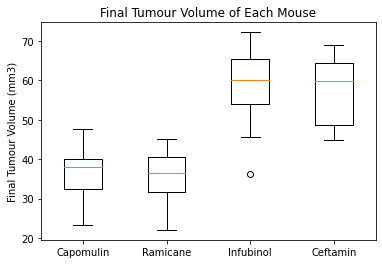

In [241]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels=treatments)

#Add title and y_label
plt.title("Final Tumour Volume of Each Mouse")
plt.ylabel("Final Tumour Volume (mm3)")
plt.show()


## Line and Scatter Plots

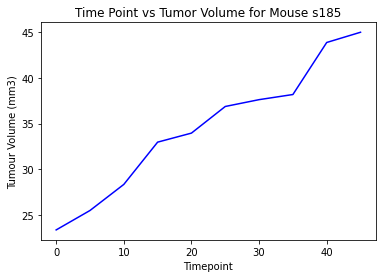

In [242]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Create a data frame that contains tumor volume and time point for mouse s185
mouse=combined_data.groupby(["Mouse ID"])
mouse_time=mouse["Timepoint"].value_counts()
mouse_vol=mouse["Tumor Volume (mm3)"].value_counts()
mouse_s185_time=mouse_time.loc["s185"]
mouse_s185_vol=mouse_vol.loc["s185"]
mouse1_s185=pd.DataFrame(mouse_s185_time)
mouse1_s185=mouse1_s185.rename(columns={"Timepoint":"Index"})
mouse1_s185.reset_index(level=0, inplace=True)
mouse2_s185=pd.DataFrame(mouse_s185_vol)
mouse2_s185=mouse2_s185.rename(columns={"Tumor Volume (mm3)":"Index"})
mouse2_s185.reset_index(level=0, inplace=True)
mouse2_s185["Timepoint"]=mouse1_s185["Timepoint"]

# Filter the DataFrame down only to those columns to chart
mouse_plot = mouse2_s185[["Timepoint","Tumor Volume (mm3)"]]

# Set the index 
mouse_plot = mouse_plot.set_index("Timepoint")

#Plot graph
plt.plot(mouse_plot, color="blue")

# Give the chart a title, x label, and y label
plt.title("Time Point vs Tumor Volume for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume (mm3)")

#Display graph
plt.show()



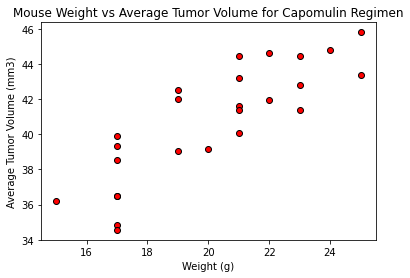

In [194]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Create dataframe holding mouse weight and average tumor volume for capomulin regimen 
capomulin=combined_data.set_index("Drug Regimen")
capomulin_weight=capomulin.loc["Capomulin", "Weight (g)"]
capomulin_vol=capomulin.loc["Capomulin", "Tumor Volume (mm3)"]
capomulin_ID=capomulin.loc["Capomulin", "Mouse ID"]
capomulin_weight=pd.DataFrame(capomulin_weight)
capomulin_vol=pd.DataFrame(capomulin_vol)
capomulin_ID=pd.DataFrame(capomulin_ID)
capomulin_vol["Weight (g)"]=capomulin_weight["Weight (g)"]
capomulin_vol["Mouse ID"]=capomulin_ID["Mouse ID"]
capomulin_group=capomulin_vol.groupby(["Mouse ID"]).mean()
capomulin_group

#Define axis
x_axis=capomulin_group["Weight (g)"]
y_axis=capomulin_group["Tumor Volume (mm3)"]

#Create scatter
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")

# Give the chart a title, x label, and y label
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#Display
plt.show()


## Correlation and Regression

Correlation = 0.84


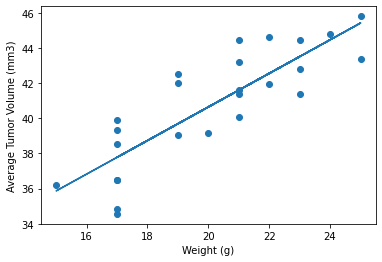

In [305]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Calculate and print correlation
corr=round(st.pearsonr(capomulin_group["Weight (g)"], capomulin_group["Tumor Volume (mm3)"])[0],2)
print(f"Correlation = {corr}")

#Create scatter plot
x=capomulin_group["Weight (g)"]
y=capomulin_group["Tumor Volume (mm3)"]
plt.scatter(x, y)

#Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) =st.linregress(capomulin_group["Weight (g)"], capomulin_group["Tumor Volume (mm3)"])

#Create equation
fit=slope*x+intercept

#Plot line
plt.plot(x, fit)

#Add title, labels & equation
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


#Display
plt.show()

